<a href="https://colab.research.google.com/github/SagarSudani/predictive-analysis-on-customer-behaviour-in-german-automobile-sector-/blob/main/germancardataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [ ]:
df = pd.read_csv("D:/dataset/gcar_data.csv")
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6265,audi,Audi A1,blue,05/2012,2012,12599,90,122,Manual,Petrol,"5,3 l/100 km",126 g/km,148000.0,Ambition TFSI Navi/Leder/SHZ/PTS/KETTE NEU
99996,54886,fiat,Fiat 500,black,12/2019,2019,9999,51,69,Automatic,Petrol,"5,2 l/100 km",120 g/km,31698.0,1.2 Lounge +Automatik + PDC
99997,76820,honda,Honda CR-V,brown,01/2019,2019,24800,127,173,Manual,Petrol,"6,3 l/100 km",143 g/km,77900.0,1.5T 2WD Elegance * 1. Hand * 24 Mon. Garantie *
99998,860,alfa-romeo,Alfa Romeo Giulietta,grey,12/2020,2020,22990,125,170,Automatic,Diesel,"5,5 l/100 km",145 g/km,52251.0,Lusso Ti 2.0 JTDM 16V Xenon Leder Navi


# Exploratory Data Analysis (EDA)

## Checking for missing values

In [ ]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Unnamed: 0                      0
brand                           0
model                           0
color                          76
registration_date               1
year                            0
price_in_euro                   0
power_kw                       75
power_ps                       72
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11239
fuel_consumption_g_km           0
mileage_in_km                  68
offer_description               0
dtype: int64


## Removing duplicates

In [ ]:
df.drop_duplicates(inplace=True)

## Dropping irrelevant or unnamed columns

In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)

## Filling missing values in price or other important columns

In [ ]:
# Displaying the first few rows of the dataset to inspect it
print("Initial dataset:")
print(df.head())

Initial dataset:
     brand           model  color registration_date  year price_in_euro  \
0     ford       Ford Kuga  black           05/2023  2023         38490   
1  hyundai     Hyundai i10  black           09/2018  2018         11555   
2     audi  Audi Q4 e-tron   grey           05/2021  2021         48886   
3    honda      Honda CR-V    red           07/2018  2018         24490   
4      kia    Kia Sportage  black           02/2023  2023         34990   

  power_kw power_ps transmission_type fuel_type fuel_consumption_l_100km  \
0      140      190         Automatic    Hybrid             5,4 l/100 km   
1       49       67            Manual    Petrol             4,6 l/100 km   
2      125      170         Automatic  Electric                      NaN   
3      114      155         Automatic    Petrol             7,5 l/100 km   
4      110      150            Manual    Petrol             5,9 l/100 km   

  fuel_consumption_g_km  mileage_in_km  \
0              124 g/km          

In [ ]:
# Cleaning numeric columns with mixed data types
def clean_numeric_column(column):
    # Convert all values to strings first, then apply cleaning
    return pd.to_numeric(
        column.astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce'
    )

# List of columns to clean and convert
numeric_columns = ['price_in_euro', 'power_kw', 'power_ps', 'mileage_in_km']

# Iterating over columns to clean
for column in numeric_columns:
    if column in df.columns:
        df[column] = clean_numeric_column(df[column])

# Handling missing values after conversion
for column in numeric_columns:
    if column in df.columns:
        df[column].fillna(df[column].median(), inplace=True)

# Verifying the results
print("Dataset after handling mixed data types:")
print(df[numeric_columns].info())
print(df.head())


Dataset after handling mixed data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price_in_euro  100000 non-null  float64
 1   power_kw       100000 non-null  float64
 2   power_ps       100000 non-null  float64
 3   mileage_in_km  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
     brand           model  color registration_date  year  price_in_euro  \
0     ford       Ford Kuga  black           05/2023  2023        38490.0   
1  hyundai     Hyundai i10  black           09/2018  2018        11555.0   
2     audi  Audi Q4 e-tron   grey           05/2021  2021        48886.0   
3    honda      Honda CR-V    red           07/2018  2018        24490.0   
4      kia    Kia Sportage  black           02/2023  2023        34990.0   

   power_kw  power_ps transmission_type fuel_type fuel_consumption_l_100km  \


## Checking and handling missing categorical values

In [ ]:

df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)
df['transmission_type'].fillna(df['transmission_type'].mode()[0], inplace=True)

## Summary statistics

In [ ]:
print(df.describe())

       price_in_euro       power_kw       power_ps  mileage_in_km
count   1.000000e+05  100000.000000  100000.000000   1.000000e+05
mean    2.943432e+04     154.907470     195.117460   8.558694e+04
std     4.844098e+04     927.287422     481.565221   7.927150e+04
min     2.000000e+00       1.000000       1.000000   0.000000e+00
25%     1.290000e+04      88.000000     120.000000   2.555000e+04
50%     2.048650e+04     117.000000     159.000000   6.800000e+04
75%     3.247000e+04     160.000000     218.000000   1.270000e+05
max     5.890500e+06   83100.000000   78100.000000   3.800000e+06


# Data Preprocessing

## Encoding categorical variables


In [ ]:
label_encoder = LabelEncoder()
df['brand'] = label_encoder.fit_transform(df['brand'])
df['model'] = label_encoder.fit_transform(df['model'])
df['color'] = label_encoder.fit_transform(df['color'])
df['transmission_type'] = label_encoder.fit_transform(df['transmission_type'])
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])


## Feature scaling for numerical variables

In [ ]:
# Cleaning the 'fuel_consumption_l_100km' column
if 'fuel_consumption_l_100km' in df.columns:
    df['fuel_consumption_l_100km'] = (
        df['fuel_consumption_l_100km']
        .astype(str)                             # Ensure all values are strings
        .str.replace(r'[^\d,]', '', regex=True) # Remove non-numeric characters except commas
        .str.replace(',', '.')                  # Replace comma with period
    )
    # Convert to numeric and handle errors
    df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')

# Handle missing values in numerical columns
numerical_cols = ['price_in_euro', 'power_kw', 'fuel_consumption_l_100km', 'mileage_in_km']
for column in numerical_cols:
    if column in df.columns:
        df[column].fillna(df[column].median(), inplace=True)

# Apply feature scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify the results
print("Cleaned and scaled numerical columns:")
print(df[numerical_cols].head())


Cleaned and scaled numerical columns:
   price_in_euro  power_kw  fuel_consumption_l_100km  mileage_in_km
0       0.186943 -0.016077                 -0.045295      -1.078413
1      -0.369097 -0.114213                 -0.045353      -0.729206
2       0.401556 -0.032253                 -0.045259      -1.026098
3      -0.102069 -0.044115                 -0.045143      -0.360623
4       0.114690 -0.048429                 -0.045259      -0.985062


## Correlation analysis

In [ ]:
# Identifying and cleaning date columns
if 'registration_date' in df.columns:  # Replace 'date_column_name' with the actual column name
    df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')  # Convert to datetime
    # Example: Extract year and month as numeric
    df['date_year'] = df['registration_date'].dt.year
    df['date_month'] = df['registration_date'].dt.month
    # Drop the original date column if necessary
    df.drop(columns=['registration_date'], inplace=True)

# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Performing correlation analysis
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
                             brand     model     color  price_in_euro  \
brand                     1.000000  0.983792  0.038778       0.045889   
model                     0.983792  1.000000  0.045873       0.041517   
color                     0.038778  0.045873  1.000000      -0.002125   
price_in_euro             0.045889  0.041517 -0.002125       1.000000   
power_kw                 -0.013896 -0.013768 -0.003719       0.075967   
power_ps                 -0.033569 -0.035364 -0.015684       0.136799   
transmission_type         0.129092  0.149663  0.038099      -0.238756   
fuel_type                 0.093013  0.101446  0.018077       0.041166   
fuel_consumption_l_100km  0.004481  0.005771  0.002450       0.007313   
mileage_in_km            -0.267542 -0.284436 -0.111990      -0.258894   
date_year                 0.264086  0.278716  0.120607       0.250285   
date_month               -0.017250 -0.017428 -0.003584      -0.024010   

                          powe

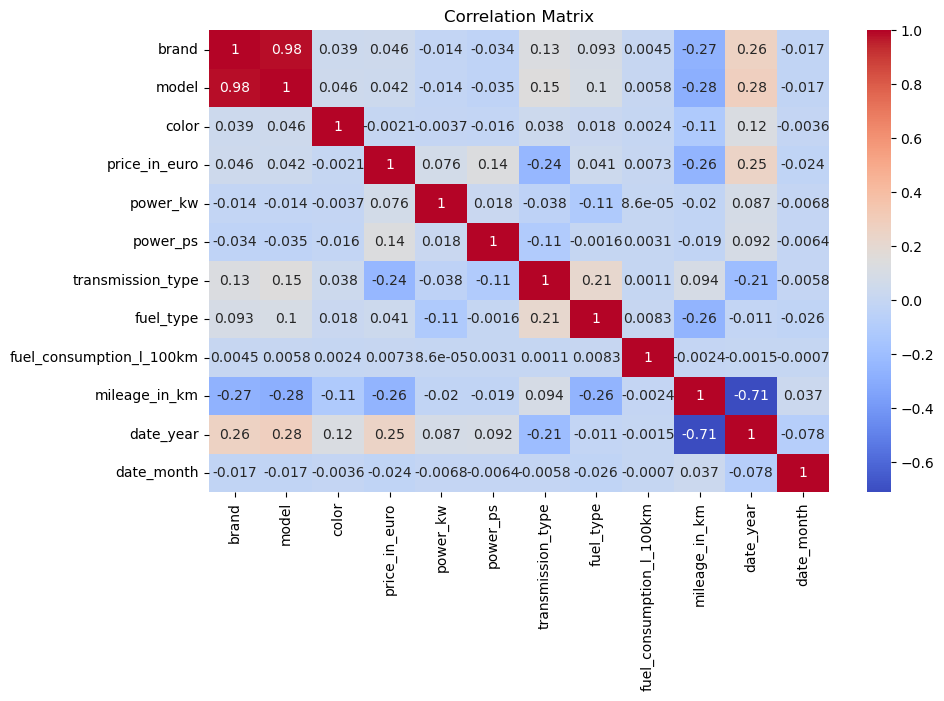

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Price Distribution: To visualize how the prices are distributed across the dataset.

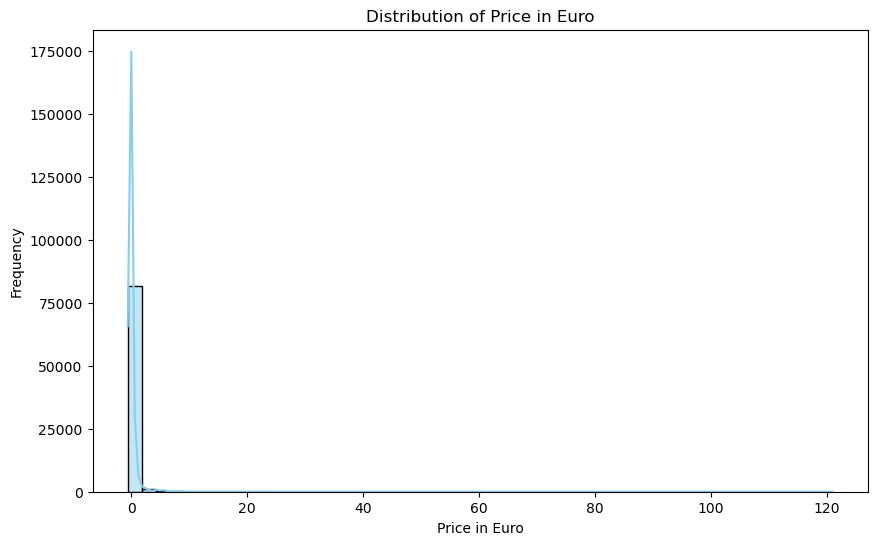

In [ ]:
# Price Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['price_in_euro'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Price in Euro')
plt.xlabel('Price in Euro')
plt.ylabel('Frequency')
plt.show()


## Power vs Price: Scatter plot to show the relationship between power_kw and price_in_euro.

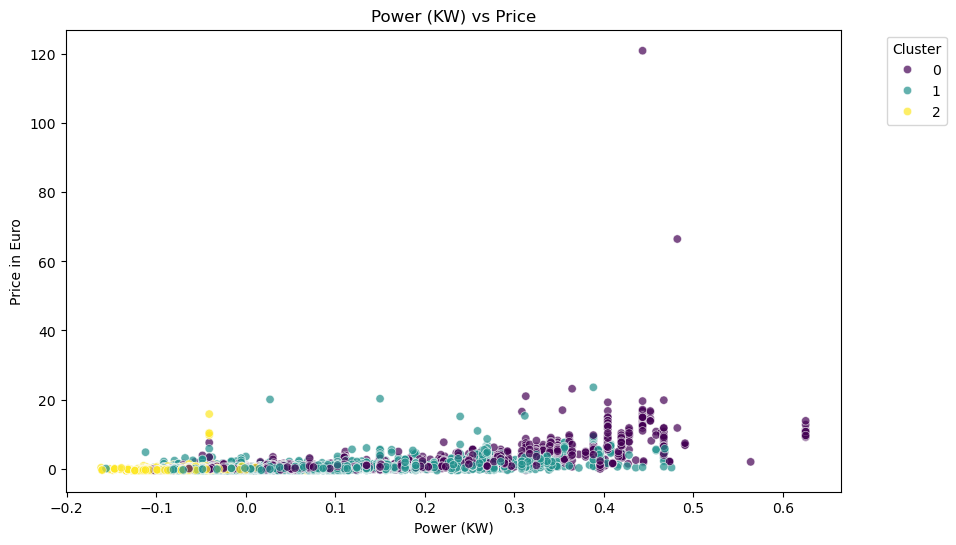

In [ ]:
# Power (KW) vs Price (Scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='power_kw', y='price_in_euro', data=df, hue='cluster', palette='viridis', alpha=0.7)
plt.title('Power (KW) vs Price')
plt.xlabel('Power (KW)')
plt.ylabel('Price in Euro')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Fuel Consumption vs Price: Box plot to show the relationship between fuel consumption and price.


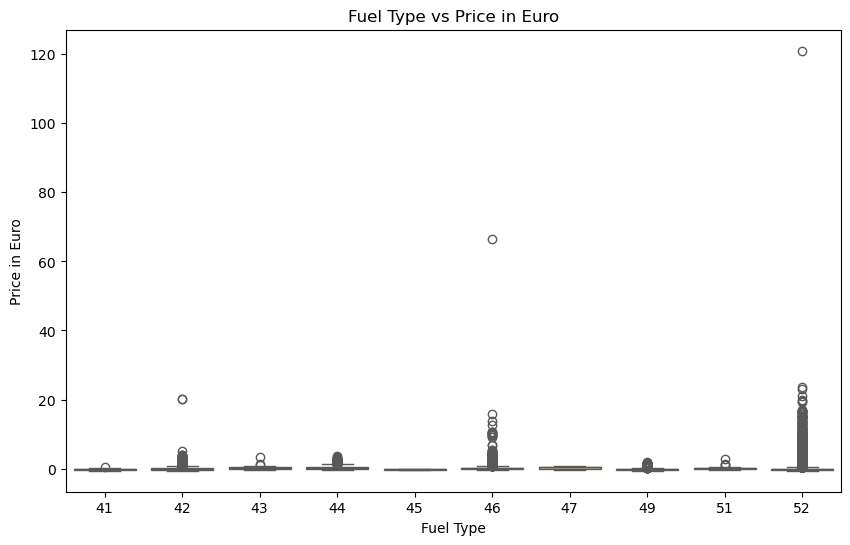

In [ ]:
# Fuel Consumption vs Price (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price_in_euro', data=df, palette='Set2')
plt.title('Fuel Type vs Price in Euro')
plt.xlabel('Fuel Type')
plt.ylabel('Price in Euro')
plt.show()


## Clustering Visualization: To visualize how the clusters are distributed based on mileage_in_km and price_in_euro

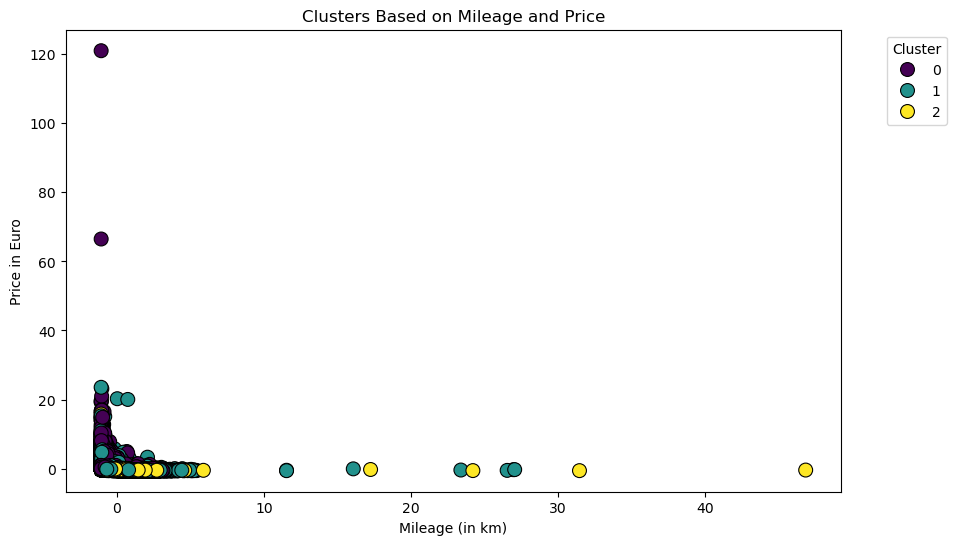

In [ ]:
# Clustering Visualization (Mileage vs Price)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage_in_km', y='price_in_euro', hue='cluster', palette='viridis', data=df, s=100, edgecolor='black')
plt.title('Clusters Based on Mileage and Price')
plt.xlabel('Mileage (in km)')
plt.ylabel('Price in Euro')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Year Distribution: A count plot to visualize the distribution of cars across years

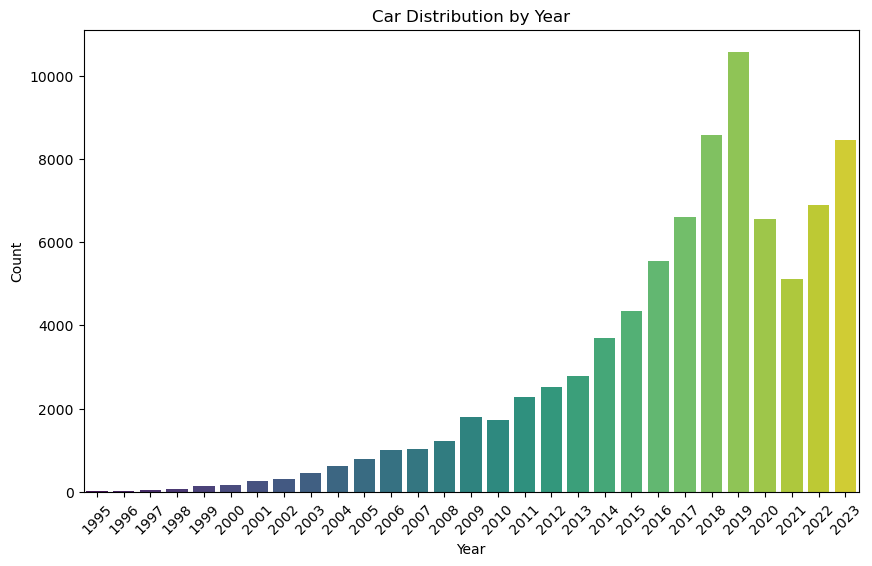

In [ ]:
# Year Distribution (Count plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Car Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Pearson correlation example for price vs mileage

In [ ]:
corr, _ = pearsonr(df['price_in_euro'], df['mileage_in_km'])
print(f'Pearson correlation between price and mileage: {corr}')

Pearson correlation between price and mileage: -0.2588943498360937


# Predictive Modelling

## Splitting data for regression and classification models

In [ ]:
df

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,date_year,date_month
0,15,393,1,2023,0.186943,-0.016077,190.0,0,46,-0.045295,124 g/km,-1.078413,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima,2023.0,5.0
1,17,451,1,2018,-0.369097,-0.114213,67.0,1,52,-0.045353,106 g/km,-0.729206,"blue Trend,Viele Extras,Top-Zustand",2018.0,9.0
2,2,51,7,2021,0.401556,-0.032253,170.0,0,44,-0.045259,0 g/km,-1.026098,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21,2021.0,5.0
3,16,417,9,2018,-0.102069,-0.044115,155.0,0,52,-0.045143,175 g/km,-0.360623,2.0 Lifestyle Plus Automatik Navi FAP,2018.0,7.0
4,22,516,1,2023,0.114690,-0.048429,150.0,1,52,-0.045259,150 g/km,-0.985062,"1.6 T 48V 2WD Spirit LED, WR",2023.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,37,2,2012,-0.347545,-0.069997,122.0,1,52,-0.045302,126 g/km,0.787337,Ambition TFSI Navi/Leder/SHZ/PTS/KETTE NEU,2012.0,5.0
99996,14,335,1,2019,-0.401219,-0.112056,69.0,0,52,-0.045310,120 g/km,-0.679806,1.2 Lounge +Automatik + PDC,2019.0,12.0
99997,16,417,4,2019,-0.095670,-0.030096,173.0,1,52,-0.045230,143 g/km,-0.096970,1.5T 2WD Elegance * 1. Hand * 24 Mon. Garantie *,2019.0,1.0
99998,0,16,7,2020,-0.133035,-0.032253,170.0,0,42,-0.045288,145 g/km,-0.420531,Lusso Ti 2.0 JTDM 16V Xenon Leder Navi,2020.0,12.0


In [ ]:
df.drop(columns=["offer_description"], inplace=True)

In [ ]:
df

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,date_year,date_month
0,15,393,1,2023,0.186943,-0.016077,190.0,0,46,-0.045295,124 g/km,-1.078413,2023.0,5.0
1,17,451,1,2018,-0.369097,-0.114213,67.0,1,52,-0.045353,106 g/km,-0.729206,2018.0,9.0
2,2,51,7,2021,0.401556,-0.032253,170.0,0,44,-0.045259,0 g/km,-1.026098,2021.0,5.0
3,16,417,9,2018,-0.102069,-0.044115,155.0,0,52,-0.045143,175 g/km,-0.360623,2018.0,7.0
4,22,516,1,2023,0.114690,-0.048429,150.0,1,52,-0.045259,150 g/km,-0.985062,2023.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,37,2,2012,-0.347545,-0.069997,122.0,1,52,-0.045302,126 g/km,0.787337,2012.0,5.0
99996,14,335,1,2019,-0.401219,-0.112056,69.0,0,52,-0.045310,120 g/km,-0.679806,2019.0,12.0
99997,16,417,4,2019,-0.095670,-0.030096,173.0,1,52,-0.045230,143 g/km,-0.096970,2019.0,1.0
99998,0,16,7,2020,-0.133035,-0.032253,170.0,0,42,-0.045288,145 g/km,-0.420531,2020.0,12.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     100000 non-null  int32  
 1   model                     100000 non-null  int32  
 2   color                     100000 non-null  int32  
 3   year                      100000 non-null  object 
 4   price_in_euro             100000 non-null  float64
 5   power_kw                  100000 non-null  float64
 6   power_ps                  100000 non-null  float64
 7   transmission_type         100000 non-null  int32  
 8   fuel_type                 100000 non-null  int32  
 9   fuel_consumption_l_100km  100000 non-null  float64
 10  fuel_consumption_g_km     100000 non-null  object 
 11  mileage_in_km             100000 non-null  float64
 12  date_year                 99947 non-null   float64
 13  date_month                99947 non-null   fl

## Splitting the data into train and test sets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Handle categorical columns with Label Encoding
label_encoder = LabelEncoder()

# Apply label encoding to the 'fuel_type' and 'fuel_consumption_g_km' columns
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)  # Remove 'g/km' part
df['fuel_consumption_g_km'] = pd.to_numeric(df['fuel_consumption_g_km'], errors='coerce')  # Convert to numeric

# Check for any NaN values after conversion
df = df.dropna()  # Drop rows with NaN values

# Define feature columns and target variable
feature_cols = ['brand', 'model', 'color', 'year', 'power_kw', 'power_ps',
                'transmission_type', 'fuel_type', 'fuel_consumption_l_100km',
                'mileage_in_km', 'date_year', 'date_month']

target_col = 'price_in_euro'

# Split the dataset into features (X) and target (y)
X = df[feature_cols]
y = df[target_col]

# Convert 'year' column from object to numeric
X['year'] = pd.to_numeric(X['year'], errors='coerce')

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)
print("Decision Tree Regressor MSE:", mean_squared_error(y_test, y_pred_dt))

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
print("Random Forest Regressor MSE:", mean_squared_error(y_test, y_pred_rf))

Linear Regression MSE: 0.2599404947742514
Decision Tree Regressor MSE: 0.12513330417563112
Random Forest Regressor MSE: 0.1205130325400285


# Clustering and Segmentation (K-Means Clustering)

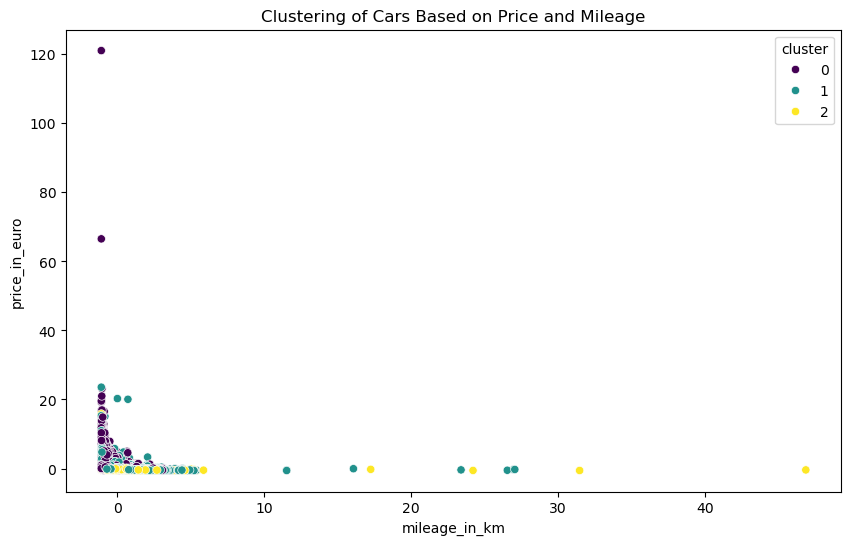

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualizing the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['mileage_in_km'], y=df['price_in_euro'], hue=df['cluster'], palette='viridis')
plt.title('Clustering of Cars Based on Price and Mileage')
plt.show()

## Customer Segmentation

In [ ]:
df

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,date_year,date_month,cluster
0,15,393,1,2023,0.186943,-0.016077,190.0,0,46,-0.045295,124.0,-1.078413,2023.0,5.0,2
1,17,451,1,2018,-0.369097,-0.114213,67.0,1,52,-0.045353,106.0,-0.729206,2018.0,9.0,2
2,2,51,7,2021,0.401556,-0.032253,170.0,0,44,-0.045259,0.0,-1.026098,2021.0,5.0,1
3,16,417,9,2018,-0.102069,-0.044115,155.0,0,52,-0.045143,175.0,-0.360623,2018.0,7.0,2
4,22,516,1,2023,0.114690,-0.048429,150.0,1,52,-0.045259,150.0,-0.985062,2023.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,37,2,2012,-0.347545,-0.069997,122.0,1,52,-0.045302,126.0,0.787337,2012.0,5.0,1
99996,14,335,1,2019,-0.401219,-0.112056,69.0,0,52,-0.045310,120.0,-0.679806,2019.0,12.0,2
99997,16,417,4,2019,-0.095670,-0.030096,173.0,1,52,-0.045230,143.0,-0.096970,2019.0,1.0,2
99998,0,16,7,2020,-0.133035,-0.032253,170.0,0,42,-0.045288,145.0,-0.420531,2020.0,12.0,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 1: Check and clean the 'year' column
df['year'] = pd.to_numeric(df['year'], errors='coerce')  # This will convert non-numeric values to NaN
df = df.dropna(subset=['year'])  # Drop rows where 'year' is NaN

# Step 3: Checking the dataset after cleaning the 'year' column
print("Cleaned dataset info:")
print(df.info())  # Ensure the 'year' column is numeric now


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 83577 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     83577 non-null  int32  
 1   model                     83577 non-null  int32  
 2   color                     83577 non-null  int32  
 3   year                      83577 non-null  int64  
 4   price_in_euro             83577 non-null  float64
 5   power_kw                  83577 non-null  float64
 6   power_ps                  83577 non-null  float64
 7   transmission_type         83577 non-null  int32  
 8   fuel_type                 83577 non-null  int64  
 9   fuel_consumption_l_100km  83577 non-null  float64
 10  fuel_consumption_g_km     83577 non-null  float64
 11  mileage_in_km             83577 non-null  float64
 12  date_year                 83577 non-null  float64
 13  date_month                83577 non-null  fl

In [ ]:
# Assuming your final dataset is in the variable 'df'
# Ensure the 'cluster' column is categorical
df['cluster'] = df['cluster'].astype(int)

# Step 1: Cluster Summary
cluster_summary = df.groupby('cluster').mean()  # Mean of numerical features by cluster
print("Cluster Summary:\n", cluster_summary)

# Count of categorical variables per cluster (e.g., brand, model, fuel_type)
categorical_summary = df.groupby('cluster')[['brand', 'model', 'color', 'fuel_type']].agg(lambda x: x.mode()[0])
print("\nCategorical Summary:\n", categorical_summary)

Cluster Summary:
              brand       model     color         year  price_in_euro  \
cluster                                                                
0        21.681461  499.588213  6.131267  2018.999281       0.349361   
1         2.842487   82.848852  5.974194  2015.239624       0.039446   
2        13.758462  363.190931  6.710973  2017.595595      -0.241989   

         power_kw    power_ps  transmission_type  fuel_type  \
cluster                                                       
0        0.014679  229.152352           0.310570  47.971776   
1        0.013394  227.588866           0.298897  46.915959   
2       -0.072754  118.984344           0.766615  48.529916   

         fuel_consumption_l_100km  fuel_consumption_g_km  mileage_in_km  \
cluster                                                                   
0                        0.007133             163.778757      -0.458412   
1                       -0.004668             156.142634       0.259628   
2    

Cluster Summary:
              brand       model     color         year  price_in_euro  \
cluster                                                                
0        21.681461  499.588213  6.131267  2018.999281       0.349361   
1         2.842487   82.848852  5.974194  2015.239624       0.039446   
2        13.758462  363.190931  6.710973  2017.595595      -0.241989   

         power_kw    power_ps  transmission_type  fuel_type  \
cluster                                                       
0        0.014679  229.152352           0.310570  47.971776   
1        0.013394  227.588866           0.298897  46.915959   
2       -0.072754  118.984344           0.766615  48.529916   

         fuel_consumption_l_100km  fuel_consumption_g_km  mileage_in_km  \
cluster                                                                   
0                        0.007133             163.778757      -0.458412   
1                       -0.004668             156.142634       0.259628   
2    

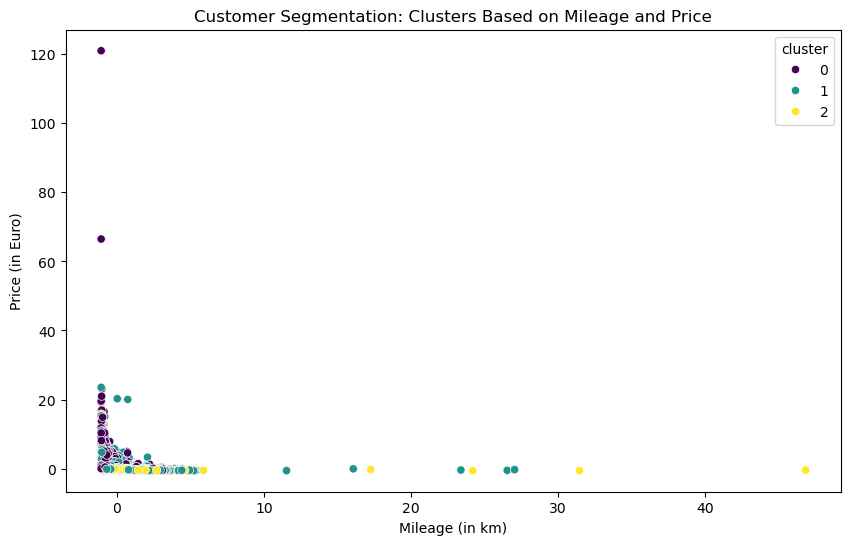

In [ ]:
# 1. Cluster Summary Analysis
cluster_summary = df.groupby('cluster').mean()  # Mean of numerical features by cluster
print("Cluster Summary:\n", cluster_summary)

# 2. Categorical summary for each cluster (e.g., mode for categorical variables)
categorical_summary = df.groupby('cluster')[['brand', 'model', 'color', 'fuel_type']].agg(lambda x: x.mode()[0])
print("\nCategorical Summary:\n", categorical_summary)

# 3. Visualizing the clusters (Price vs Mileage with Cluster Colors)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage_in_km', y='price_in_euro', hue='cluster', palette='viridis', data=df)
plt.title('Customer Segmentation: Clusters Based on Mileage and Price')
plt.xlabel('Mileage (in km)')
plt.ylabel('Price (in Euro)')
plt.show()

##  Customer Segmentation Model using Random Forest Classifier


Random Forest Classifier Accuracy: 0.9997607083034219

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3573
           1       1.00      1.00      1.00      6933
           2       1.00      1.00      1.00      6210

    accuracy                           1.00     16716
   macro avg       1.00      1.00      1.00     16716
weighted avg       1.00      1.00      1.00     16716


Confusion Matrix:
 [[3572    0    1]
 [   0 6930    3]
 [   0    0 6210]]

Feature Importance:
 brand                       0.381704
model                       0.376109
power_ps                    0.089146
power_kw                    0.081723
price_in_euro               0.019703
transmission_type           0.017559
date_year                   0.008715
fuel_consumption_l_100km    0.008197
year                        0.007294
mileage_in_km               0.005909
fuel_type                   0.002999
color                       0.000580

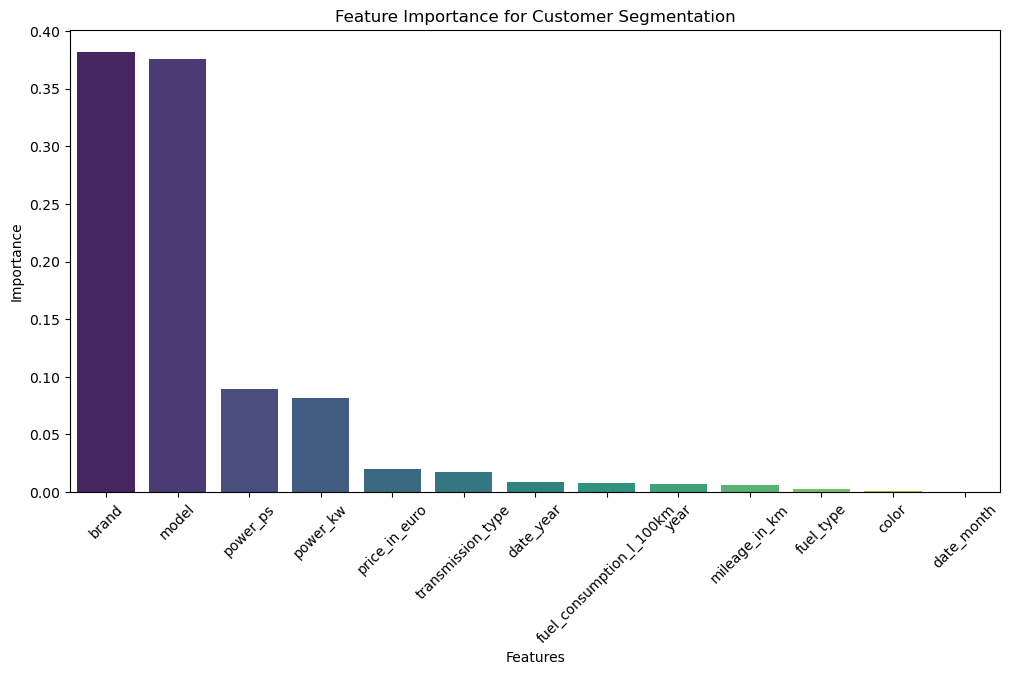

In [ ]:

# First, prepare the features and labels for classification
X_cluster = df[feature_cols]  # Features
y_cluster = df['cluster']  # Target variable (cluster)

# Split into training and testing datasets
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_cluster, y_train_cluster)

# Make predictions and evaluate the model
y_pred_cluster = rf_classifier.predict(X_test_cluster)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test_cluster, y_pred_cluster))
print("\nClassification Report:\n", classification_report(y_test_cluster, y_pred_cluster))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cluster, y_pred_cluster))

# 5. Feature Importance (to see which features are most important in the segmentation)
feature_importance = pd.Series(rf_classifier.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("\nFeature Importance:\n", feature_importance)

# 6. Visualizing Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='viridis')
plt.title('Feature Importance for Customer Segmentation')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()